# Assignment #10 - Data Gathering and Warehousing - DSSA-5102

Instructor: Melissa Laurino</br>
Spring 2024</br>

Name: Louise Ramos
</br>
Date: 04/25/2024
<br>
<br>
**At this time in the semester:** <br>
--We have explored a dataset. <br>
--We have cleaned our dataset. <br>
--We created a Github account with a repository for this class and included a Metadata file about our data. <br>
--We introduced general and more advanced SQL syntax, queries, and applications in R.<br>
--Created our own database from scratch in R using libraries RMariaDB and RSQLite <br>
--Populated our databases we created from scratch<br>
--Created a visual enhanced entity relationship diagram for our database.<br>
--Connect to a website using an API. Gather live data from a website using an API.<br>
<br>

**Objective**: Use the collected data to solve a real world problem.<br>
<br>
**iNaturalist**: iNaturalist is a community of citizen scientists that encourages accurate data collection and species identification of the natural world. 
<br>
No observations of captive plants or is should be included in the iNaturalist data. Research grade observaitons have been verified by the community in terms of species ID, location, etc. Research grade observations have been verified by the community of experts in that field. 
<br>
API's are useful to bridge the gap between manually querying and downloading data, and then uploading them into R/Python, by just working with the live data directly in your platform of choice.

Follow the instructions below to complete the assignment. Answer any questions in markdown cell boxes. Be sure to comment all code.


Learn more about the iNaturalist API: https://api.inaturalist.org/v1/docs/#!/Observations/get_observations_observers<br><br>

R packages for working with iNaturalist API to gather live data:<br>
spocc: https://cran.r-project.org/web/packages/spocc/spocc.pdf <br>
rinat: https://cran.r-project.org/web/packages/rinat/rinat.pdf

## Part 2 - Accessing iNaturalist data through package API

When it comes to R and Python, there are many packages already created by users that save you the time while connecting to an API by connecting with packages instead. This way, you do not need to obtain your access token because you are using a package or an app that has already completed that process. We will continue with iNaturalst for this example. 

**R:** <br>
spocc (https://cran.r-project.org/web/packages/spocc/spocc.pdf) - A programmatic interface to many species occurrence data sources,including Global Biodiversity Information Facility ('GBIF'), 'iNaturalist',
'eBird', Ocean 'Biogeographic' Information System ('OBIS'), and many more! <br><br>
rinat (https://cran.r-project.org/web/packages/rinat/rinat.pdf) - A programmatic interface to the API provided by the 'iNaturalist' website to download species occurrence data submitted by citizen scientists. <br><br>
iNatTools - Outdated and may not work with current versions of R, but resources online using iNatTools may relate to the packages above.<br><br>
**Python:** <br>
pyiNaturalist (https://pypi.org/project/pyinaturalist/0.12.0/) <br>

In [85]:
# Installing relevant Python packages
from pyinaturalist import *
import pandas as pd
import time

In [86]:
# Test out pyinaturalist:

# Get iNaturalist observations of Harbor porpoises for the year 2024, set per_page high for pd.json_normalize
porpoise = get_observations(q='Harbour Porpoise', year = 2024, page="all")
# Preview the data
pprint(porpoise["results"][:5])

# Unique scientific names present
porpoise_frame = pd.json_normalize(porpoise["results"])
print(set(porpoise_frame["taxon.name"]))

 ID          Taxon ID   Taxon                        Observed on    User             Location                     
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  195955366   623441     Phocoena phocoena vomerina   Jan 06, 2024   liamragan        Whatcom County, US-WA, US    
                         (Eastern Pacific Harbour                                                                  
                         Porpoise)                                                                                 
  196031955   41440      Phocoena phocoena (Harbour   Jan 07, 2024   louisb           Fife, UK                     
                         Porpoise)                                                                                 
  196069242   41440      Phocoena phocoena (Harbour   Jan 07, 2024   thebugger        San Francisco Bay, San       
                         Porpoise)                                                    Francisco, CA, US            
  196255149   41440      Phocoena phocoena (Harbour   Jan 01, 2024   wildnettle       Browns Bay, Edmonds, WA, US  
                         Porpoise)                                                                                 
  196510030   41440      Phocoena phocoena (Harbour   Jan 09, 2024   nagelhoutandre   Schiermonnikoog,             
                         Porpoise)                                                    Schiermonnikoog, Friesland,  
                                                                                      Netherlands                 

{'Phocoena phocoena phocoena', 'Dendronotus rufus', 'Sabellinae', 'Phocoena phocoena vomerina', 'Phocoena phocoena relicta', 'Eudistylia vancouveri', 'Phocoena phocoena'}


 ID         Taxon ID   Taxon                         Observed on    User             Location                     
 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 
  808758     41440      Phocoena phocoena (Harbour    Apr 08, 2013   superpugger      United States                
                        Porpoise)                                                                                  
  2925071    41440      Phocoena phocoena (Harbour    Mar 03, 2013   tbrown10         Suffolk County, US-NY, US    
                        Porpoise)                                                                                  
  3955328    623433     Phocoena phocoena phocoena    Aug 23, 2016   jheuser          Middletown, NJ, USA          
                        (Atlantic Harbour Porpoise)                                                                
  22482827   623433     Phocoena phocoena phocoena    Apr 13, 2019   brittanyporter   Hamilton Heights, New York,  
                        (Atlantic Harbour Porpoise)                                   NY, USA                      
  22595512   623433     Phocoena phocoena phocoena    Apr 16, 2019   rangelillo       811 Brook Ave, Union Beach,  
                        (Atlantic Harbour Porpoise)                                   NJ, US                      

<Axes: xlabel='longitude'>

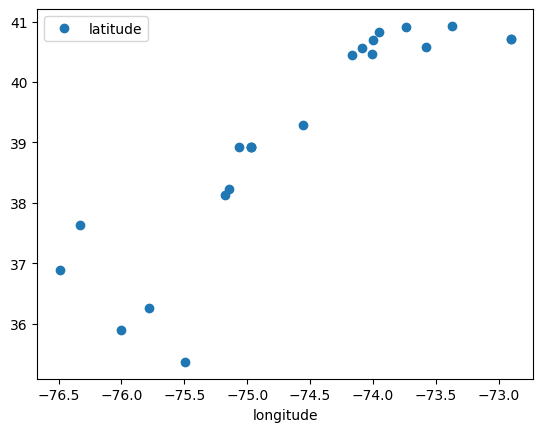

In [87]:
# Let's look at JUST the Southernmost range of Harbor porpoise (New Jersey-North Carolina)

# Bound off Northern and Southern most limit of New Jersey and North Carolina 
bounds = [33, -78, 41, -69] # min_lat, min_long, max_lat, max_long

# Get the data from iNaturalist
porpoise_map = get_observations(q = "Harbour Porpoise", nelat=bounds[2], nelng=bounds[3], swlat=bounds[0], swlng=bounds[1], page="all")
#Preview the data
pprint(porpoise_map["results"][:5])

porpoise_map_frame = pd.json_normalize(porpoise_map["results"])
# Set up latitude and longitude columns
porpoise_map_frame["latitude"] = porpoise_map_frame["location"].str[0]
porpoise_map_frame["longitude"] = porpoise_map_frame["location"].str[1]
# Create a quick plot/map of observations.
porpoise_map_frame.plot(x="longitude", y="latitude", style='o')



**STOP HERE**<br>
Using this package, we have a DOWNLOAD limit with their API, How can we possibly get around this? <br>
If you want to explore all of the data iNaturalist has to offer, unfortunetly RiNat is not going to cut it.
RiNat is a good resource for investigating small queries or very specific queries that yield small results.
<br><br>
Let's try a different API wrapper package instead and use it with a different approach:

## Case Study: **Northern Diamondback Terrapins** (_Malaclemys terrapin terrapin_)

Background information:<br>Diamondback terrapins are New Jersey's only species of brackish water turtle. Brackish water has a mixture of both salt water and fresh water. They are commonly found in the back bays and saltmarshes of New Jersey. They can be found from Massachusetts to North Carolina. The females come ashore to nest in the summer months, while the males will not leave the water at all. Coming ashore to nest has consequences and risks for this species that include human-caused mortalities from vehicle strikes and natural predation. Although the males do not leave the water, human-caused mortality due to crab pots and ghost gear remain a huge threat to both sexes for this species of special concern. Up until 2016, terrapins were hunted during their winter hibernation for terrapin soup! <br>
To further the concern for New Jersey's Diamondback terrapin, the species has temperature-dependent sex determination. Studies from research institutes and rehabilitation facilities, like Stockton University, have shown captive eggs that are incubated at a low temperature will produce all male terrapins and captive eggs that are incubated at a high temperature will produce all female terrapins. It is hypothesized that the determination of sexes may only vary by just a few degrees. If this is the case, how will the threat of climate change and the warming salt marshes impact our local population?<br><br>
**Note:** New Jersey's subspecies of terrapin is the NORTHERN Diamondback Terrapin (_Malaclemys terrapin terrapin_) or (_Genus species subspecies_). We want to make sure we are selecting for the taxon_id of the NORTHERN Diamondback Terrapin. <br><br>

### You are a data scientist for a wildlife contracting company, ML Wildlife. 

### ML Wildlife Mission Statement: To pioneer innovative approaches to wildlife management and policy-making through data collection, storage, and analysis. It is the company's goal to create sustainable connections between human activities and the natural world to preserve biodiversity.

#### In a New Jersey town (that will remain unnamed), there is a proposal to begin construction during the Summer of 2024 on a bike path that will run for 2.5 miles through the salt marsh. The bike path will be a raised (7ft) concrete pathway, or seawall, to accomodate for high and low tides to ensure that flooding is not an issue for the path. Water or wildlife (Turtles, fish, crabs, inverts, etc.) can not pass through or under the pathway. Birds can fly over the pathway. Construction is estimated to last four months. The goal of the pathway is to teach people about wildlife by walking through the man-made salt marsh trail. Railings will be placed on either side of the pathway to ensure human safety, but what about the safety of the wildlife?

#### Local environmentalists and biologists are concerned with the proposed bike path, especially for the state's Diamondback terrapin population. Will this bike path create an obstacle that will force more females to cross the roads to lay their eggs? What about the eggs that are laid along the bike bath already from the year before? Will the nests be ruined in the process? In addition to the Diamondback terrapin, additional species also utilize this area for nesting and feeding like the Ipswich Sparrow, which is a subspecies of the Savannah Sparrow that has a very limited range. The saltmarsh serves as an important nursery ground for Atlantic Menhaden, the Mid-Atlantic ecosystem's "Most Important Fish of the Sea."

Your job is to:<br>
--Collect citizen science observations from 2019-2024 in iNaturalist of the Northern Diamondback terrapin using the iNaturalist API with R package, spocc.<br>
--Upload that data into a database either locally or on your MySQL server. <br>
--Use SQL to: <br>
    ----Select for research grade observations only. We only want observations that have been accepted by expert naturalists or scientists that confirm the observation.<br>
    ----Determine the best time of year (Or months or weeks or time of day) for project construction.<br>
    ----Determine what subset of the population (Egg, Juvennile or Adult) you believe would be most impacted. <br>
    ----Determine the general observaiton population demographics, or range, for New Jersey terrrapins.<br>
    ----Explore two other species that inhabit and utilize the saltmarsh (Examples are the Ipswich sparrow, Seaside sparrow, Saltmarsh sparrow, Atlantic menhaden, or the Mud fiddler crab and Eastern Mud snail (What terrapins eat) and hypothesize how they would be impacted by this construction project after you have explored their data. Use the data from these other two species to support your decision below. If you would like to choose another species you can, just be mindful of iNaturalist API limits. I recommend looking at the iNaturalist website and explore the different species before collecting data that you do not need. <br>
    
--Provide your overall determination approving or disproving the project with three visualizations to go along with the queried SQL data. **Breifly state why and include three graphics** - but you do not have to go into too much biology detail and there is no right or wrong answer. <br>
--State two possible reasons for results for error in your visualizations.<br>
<br><br>
_Also note, this is a **mostly** "fictional" case study_ :). <br>

**Background information on the other species:**<br>
Ipswich Sparrow (_Passerculus sandwichensis princeps_) - A subspecies of the Savannah Sparrow. Subspecies can breed independently of the parent species. These birds feed directly in the dunes and saltmarshes. They are not as common as the parent species.<br>
Atlantic Menhaden (_Brevoortia tyrannus_) - A small schooling bait fish less than 10in in length. These fish begin their lives in the back bays and salt marshes. They are the primary food source for many species of marine mammals, birds, sharks, and larger fish. They are harvested commercially by us humans in the Mid-Atlantic to create fertilizer, fish oil, pet food, lip products and many other uses.<br>
Eastern Mud Snail (_Ilyanassa obsoleta_) - Food source to many species of birds and terrapins. The ocean clean up crew - feeds on detritis and other matter. <br>
Mud fiddler crab (_Minuca pugnax_) - Only found on the East Coast of the United States. Like many other is, it is thought this species is expanding the Northern range due to climate change.

How many different species of terrapins were documented worldwide on iNaturalist in the year 2024? 

In [88]:
#This is important to examine because we only want to look at the NORTHERN Diamondback terrapin because that is the species that inhabits New Jersey.
terrapin= get_observations(q="Diamondback Terrapin", year=2024, page="all")
# Unique scientific names present
terrapin_frame = pd.json_normalize(terrapin["results"])
# Filter for only research grade observations
terrapin_species = set(terrapin_frame["taxon.name"])
print(terrapin_species)
print(f"There were {len(terrapin_species)} terrapin species observed in 2024.")

{'Malaclemys terrapin littoralis', 'Malaclemys terrapin centrata', 'Malaclemys terrapin macrospilota', 'Malaclemys terrapin rhizophorarum', 'Malaclemys terrapin', 'Malaclemys terrapin pileata', 'Malaclemys terrapin terrapin', 'Malaclemys'}
There were 8 terrapin species observed in 2024.


Our results show there are 8 different species/subspecies of terrapins documented worldwide in 2024. _Malaclemys terrapin terrapin_ are the species we want because they inhabit our area.

To obtain a taxon_id for any species or a place_id from iNaturalist:<br>
--Log in to the account you created <br>
--Hit Explore tab at the top <br>
--Search for ANY species you would like (In our case, it's Northern Diamondback Terrapin)<br>
--The taxon_id for the species is found in the URL: https://www.inaturalist.org/observations?place_id=any&subview=map&**taxon_id=39838**
<br>
--More information on the different attributes you can use to filter the data: https://www.inaturalist.org/pages/annotations

In [89]:
# Get taxon_id from requested data
northern_terrapins_ids = terrapin_frame["taxon.id"].loc[terrapin_frame["taxon.preferred_common_name"] == "Northern Diamondback Terrapin"]

# Check that id matches provided id
print(f"Northern Diamondback Terrapin ID: {list(northern_terrapins_ids)[0]}")

# Get i ids for Atlantic Menhaden (Brevoortia tyrannus) and 
menhaden = get_observations(q="Brevoortia tyrannus", year=2024, page="all")
menhaden_frame = pd.json_normalize(menhaden["results"])
menhaden_ids = menhaden_frame["taxon.id"].loc[menhaden_frame["taxon.name"] == "Brevoortia tyrannus"]
print(f"Menhaden ID: {list(menhaden_ids)[0]}")

# Mud Fiddler Crabs (Minuca pugnax)
crabs = get_observations(q="Minuca pugnax", year=2024, page="all")
crabs_frame = pd.json_normalize(crabs["results"])
crab_ids = crabs_frame["taxon.id"].loc[crabs_frame["taxon.name"] == "Minuca pugnax"]
print(f"Mud Fiddler Crab ID: {list(crab_ids)[0]}")
# Animal ids for questions (Northern Diamondback Terrapin, Atlantic Menhaden, Mud Fiddler Crab)
nbdt_id = 39838
menhaden_id = 51363
fiddler_id = 555970

Northern Diamondback Terrapin ID: 39838
Menhaden ID: 51363
Mud Fiddler Crab ID: 555970


Write a function that selects for ANY specific variables to help you answer the questions above. <br>
A great resource is found here for writing a looping function that does not stress out the API: https://eleanor-jackson.com/post/2021-04-06-searching-for-spring/ <br>
<br>
The API call: <br>
"https://api.inaturalist.org/v1/observations?....<br><br>
taxon_id=", taxon_id, "& #I have supplied the taxon ID above for NDBT, but feel free to adjust or explore others to help answer your objectives.<br><br>
place_id=any& #Observation IDs are for ANYWHERE in the world. I specifically chose NDBT because I know they only exist from Massachusetts to North Carolina. So I know I will not be getting millions of rows of data because it is a species with a limited geography.<br>
<br>
d1=2020-01-01& #The date you are collecting observations from. 2020-Present. Earlier dates will take longer processing times. <br>
<br>
per_page=200& #The number of results per query. **NOTE** The iNaturalist API ONLY allows for 200 records at a time. This is why we have a function below to loop every 200 observations.<br>
<br>
order_by=id& #Order by species id<br>
<br>
order=asc& #Ascending order<br>
<br>
id_above=0"<br><br>

**A detailed explanation on these parameters can be found here: https://www.inaturalist.org/pages/search+urls**

Listing multiple taxon ID's:
https://www.inaturalist.org/observations?place_id=any&taxon_ids=85553,26039,47113

Multiple taxa using a List (Define your list beforehand).

You can use lists on iNaturalist to restrict a search to a set of taxa. For example, https://www.inaturalist.org/lists/111820-Chicago-Wilderness-Region-Spring-Wildflowers is a list that is already set up.

Sort by Dates or Randomly

The Identify Filters panel already has options built in to sort by Date Added (default), Date Observed, Date Updated (edited), Faves, or Random. Sorting options are Descending (default) or Ascending.

Two of these options are not available in the Explore filters, but can still be added manually: Date Updated and Random. To add these, use

    order_by=updated_at
    order_by=random

Sorting order is specified by

    order=desc or
    order=asc

Annotations

term_id= - the annotation group

    1=Life Stage, 9=Sex, 12=Plant Phenology, 17=Alive or Dead

term_value_id= - the value within the group

    Life Stage: 2=Adult, 3=Teneral, 4=Pupa, 5=Nymph, 6=Larva, 7=Egg, 8=Juvenile, 16=Subimago
    Sex: 10=Female, 11=Male
    Plant Phenology: 13=Flowering, 14=Fruiting, 15=Flower Budding, 21=No Evidence of Flowering
    Alive or Dead: 18=Alive, 19=Dead, 20=Cannot Be Determined


In [90]:
# Defining function for calling the api
def call_inaturalist_api(taxon_id: int, observed_after: int = 2019, limit: int = 200, place_id: int = 51, quality: str = "research"):
    """Calls the iNaturalist API with the specified inputs in sets of 200 records and concatenates them into a single DataFrame."""
    desired_columns = ["id", "taxon.id", "taxon.preferred_common_name", "taxon.name", "taxon.rank", "location", "place_guess", "observed_on_details.date", "user.login_exact", "quality_grade", "annotations"]
    nat_response = get_observations(taxon_id=taxon_id, d1=observed_after, quality_grade=quality, per_page = limit, place_id=place_id, order="asc", order_by="id", term_id_or_unknown=1)
    nat_frame = pd.json_normalize(nat_response["results"])
    nat_frame = nat_frame[nat_frame.columns.intersection(desired_columns)]
    length = len(nat_frame)

    while length == 200:
        min_id = max(nat_frame["id"])
        temp_response = get_observations(taxon_id=taxon_id, d1=observed_after, quality_grade=quality, per_page = limit, place_id=place_id, order="asc", order_by="id", id_above=min_id)
        temp_frame = pd.json_normalize(temp_response["results"])
        temp_frame = temp_frame[nat_frame.columns]
        length= len(temp_frame)
        nat_frame = pd.concat([nat_frame, temp_frame], ignore_index=True)
        time.sleep(0.1)
    # Change column names to lowercase and replace periods with underscores
    nat_frame.columns = nat_frame.columns.str.replace(".", "_")
    nat_frame.columns = map(str.lower, nat_frame.columns)
    # Create latitude and longitude columns to make future SQL parsing easier
    nat_frame[['latitude', 'longitude']] = pd.DataFrame(nat_frame['location'].tolist(), columns=['latitude', 'longitude'])

    # Process annotations to be readable string [Egg, Juvenile, Adult, None]
    annotation_dict = {2: "Adult", 7: "Egg", 8: "Juvenile"}
    for index, row in nat_frame.iterrows():
        annotations = row["annotations"]
        if annotations:
            for entry in annotations:
                if (entry["controlled_attribute_id"] == 1) & (entry["controlled_value_id"] in annotation_dict):
                    lifestage = annotation_dict[entry["controlled_value_id"]]
        else:
            lifestage = "None"
        nat_frame.loc[index, "annotations"] = lifestage

    # Drop location since it is a duplicate now
    nat_frame.drop(columns=['location'], inplace=True)
    return nat_frame

# Get a DataFrame for each animal we are concerned with
terrapins = call_inaturalist_api(39838)
menhadens = call_inaturalist_api(51363)
fiddlers = call_inaturalist_api(555970)

# Preview Terrapin Frame
print(terrapins.head(5))

  quality_grade annotations        id                 place_guess  \
0      research        None  21878576              New Jersey, US   
1      research        None  24317836              New Jersey, US   
2      research        None  24532568  Cape May County, US-NJ, US   
3      research        None  26008254              New Jersey, US   
4      research        None  26107647              New Jersey, US   

  observed_on_details_date                    taxon_name  taxon_rank  \
0               2019-04-01  Malaclemys terrapin terrapin  subspecies   
1               2019-05-01  Malaclemys terrapin terrapin  subspecies   
2               2019-05-04  Malaclemys terrapin terrapin  subspecies   
3               2019-05-29  Malaclemys terrapin terrapin  subspecies   
4               2019-05-31  Malaclemys terrapin terrapin  subspecies   

   taxon_id    taxon_preferred_common_name user_login_exact   latitude  \
0     39838  Northern Diamondback Terrapin      reclaimednj  39.443403   
1   

**STOP** <br>
Remember that SQL does not work well with periods in column names or uppercase letters. Make sure your column headers do not have periods and are not in all capital letters.

In [91]:
# All columns transformed to lowercase and periods are replaced with underscores


Create a database for your data:

In [92]:
# SQL/ Graphing specific imports
import sqlite3
import os.path
import matplotlib.pyplot as plt

In [93]:
# Connect/create sqlite database in base directory
database_name = "case_study.db"
conn = sqlite3.connect(database_name)

# Create a cursor object to interact with the database
cursor = conn.cursor()


# Commit the changes and close the connection
conn.commit()

if os.path.isfile(database_name):
    print("Database created successfully!") 

Database created successfully!


**STOP**<br>
Whether you created your database locally or on a server, double check the file has been created.

Create the tables for your database schema: (Use SQL syntax)

In [94]:
# Creating tables per i I am analyzing in SQL Database
animals = ["terrapins", "menhadens", "fiddlers"]

for animal in animals:
    cursor.execute(f'''
    CREATE TABLE IF NOT EXISTS {animal}_table (
        id INTEGER PRIMARY KEY,
        quality_grade TEXT,
        latitude REAL,
        longitude REAL,
        place_guess TEXT,
        observed_on_details_date TEXT,
        annotation TEXT,
        taxon_name TEXT,
        taxon_rank TEXT,
        taxon_id INTEGER,
        taxon_preferred_common_name TEXT,
        user_login_exact TEXT
    )
    ''')
    print(f"Created table for {animal} successfully!")
# Commit the changes
conn.commit()

Created table for terrapins successfully!
Created table for menhadens successfully!
Created table for fiddlers successfully!


Great! Time to populate the database:<br>
Don't forget to recycle your code you worked so hard to complete for Assignment #6-#8 :) 

In [95]:
# Upload data to database tables
terrapins.to_sql("terrapins_table", conn, if_exists="replace", index=False)
menhadens.to_sql("menhadens_table", conn, if_exists="replace", index=False)
fiddlers.to_sql("fiddlers_table", conn, if_exists="replace", index=False)

# Check that the tables are populated and match the DataFrame size (i.e. no duplicates or missing info)
for animal in animals:
    # Grab the first three rows of each table
    cursor.execute(f'''
    SELECT * FROM {animal}_table LIMIT 3
    ''')

    # Fetch the results
    data = cursor.fetchall()

    # Print the results
    for row in data:
        print(row)
    
    # Get the size of each table
    cursor.execute(f'''
    SELECT COUNT(*) FROM {animal}_table
    ''')
    # Fetch the result
    rows = cursor.fetchone()[0]

    # Print the number of rows
    print(f"Number of rows: {rows}")
conn.close()

('research', 'None', 21878576, 'New Jersey, US', '2019-04-01', 'Malaclemys terrapin terrapin', 'subspecies', 39838, 'Northern Diamondback Terrapin', 'reclaimednj', 39.4434030957, -74.5628932284)
('research', 'None', 24317836, 'New Jersey, US', '2019-05-01', 'Malaclemys terrapin terrapin', 'subspecies', 39838, 'Northern Diamondback Terrapin', 'girliesquirrel', 39.1845805035, -75.1559917537)
('research', 'None', 24532568, 'Cape May County, US-NJ, US', '2019-05-04', 'Malaclemys terrapin terrapin', 'subspecies', 39838, 'Northern Diamondback Terrapin', 'bosphorus', 39.1505064153, -74.993407227)
Number of rows: 3121
('research', 'None', 19713529, '102 Concord Ave, Middletown, NJ 07737, USA', '2019-01-18', 'Brevoortia tyrannus', 'species', 51363, 'Atlantic Menhaden', 'wsimmons', 40.4249706775, -74.0630714223)
('research', 'None', 26201269, 'Hoboken, NJ 07030, USA', '2019-06-01', 'Brevoortia tyrannus', 'species', 51363, 'Atlantic Menhaden', 'naomi77', 40.7482872009, -74.023651123)
('research',

My data is showing my annotations column as a list so I want to convert it to a character string for SQL:

----Select for research grade observations only. We only want observations that have been accepted by expert naturalists or scientists that confirm the observation.<br>
----Determine the best time of year (Or months or weeks or time of day) for project construction.<br>
----Determine what subset of the population (Egg, Juvennile or Adult) you believe would be most impacted. <br>
----Determine the general observaiton population demographics, or range, for New Jersey terrrapins.<br>
----Explore two other species that inhabit and utilize the saltmarsh (Examples are the Ipswich sparrow, Seaside sparrow, Saltmarsh sparrow, Atlantic menhaden, or the Mud fiddler crab and Eastern Mud snail (What terrapins eat) and hypothesize how they would be impacted by this construction project after you have explored their data. Use the data from these other two species to support your decision below. If you would like to choose another species you can, just be mindful of iNaturalist API limits. I recommend looking at the iNaturalist website and explore the different species before collecting data that you do not need. <br>
    
--Provide your overall determination approving or disproving the project with three visualizations to go along with the queried SQL data. **Breifly state why and include three graphics** - but you do not have to go into too much biology detail and there is no right or wrong answer. <br>
--State two possible reasons for results for error in your visualizations.<br>
<br><br>
_Also note, this is a **mostly** "fictional" case study_ :). <br>

By this point, all of our data is loaded into a database of your choosing. Use a combination of SQL queries to explore the questions noted above.

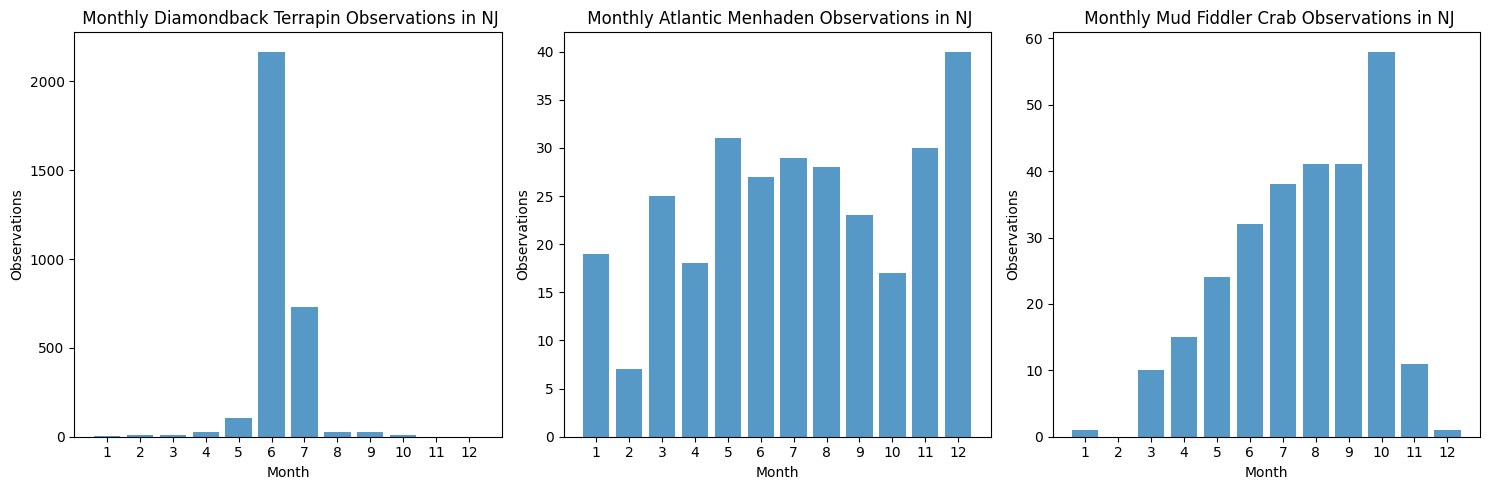

In [96]:
# Dict for proper animal naming based on shorthand
animal_dict = {"terrapins": "Diamondback Terrapin", "menhadens": "Atlantic Menhaden", "fiddlers": "Mud Fiddler Crab"}

# Perform sql queries and analysis on each i table
conn = sqlite3.connect("case_study.db")

# Create a cursor object to interact with the database
cursor = conn.cursor()

# Create a figure and axes for grouping like plots as subplots
fig, axis = plt.subplots(1, 3, figsize=(15, 5))
i = 0

for animal in animals:
    # Get the data from SQL database (group observations by month and only give research grade observations)
    cursor.execute(f'''
    SELECT 
        SUBSTR(observed_on_details_date, 6, 2) AS observation_month,
        COUNT(*) AS observation_count
    FROM {animal}_table
    WHERE quality_grade = 'research'
    GROUP BY SUBSTR(observed_on_details_date, 6, 2)
    ''')

    # Fetch the results
    results = cursor.fetchall()


    # Get a list for months and observation counts for graphing
    months = [int(row[0]) for row in results]
    counts = [row[1] for row in results]

    # Plot each histogram
    axis[i].bar(months, counts, align='center', alpha=0.75)
    axis[i].set_xlabel('Month')
    axis[i].set_ylabel('Observations')
    axis[i].set_title(f' Monthly {animal_dict[animal]} Observations in NJ')
    axis[i].set_xticks(range(1, 13))  # Assuming observations span all 12 months
    i = i + 1


# Show plot
plt.tight_layout()
plt.show()

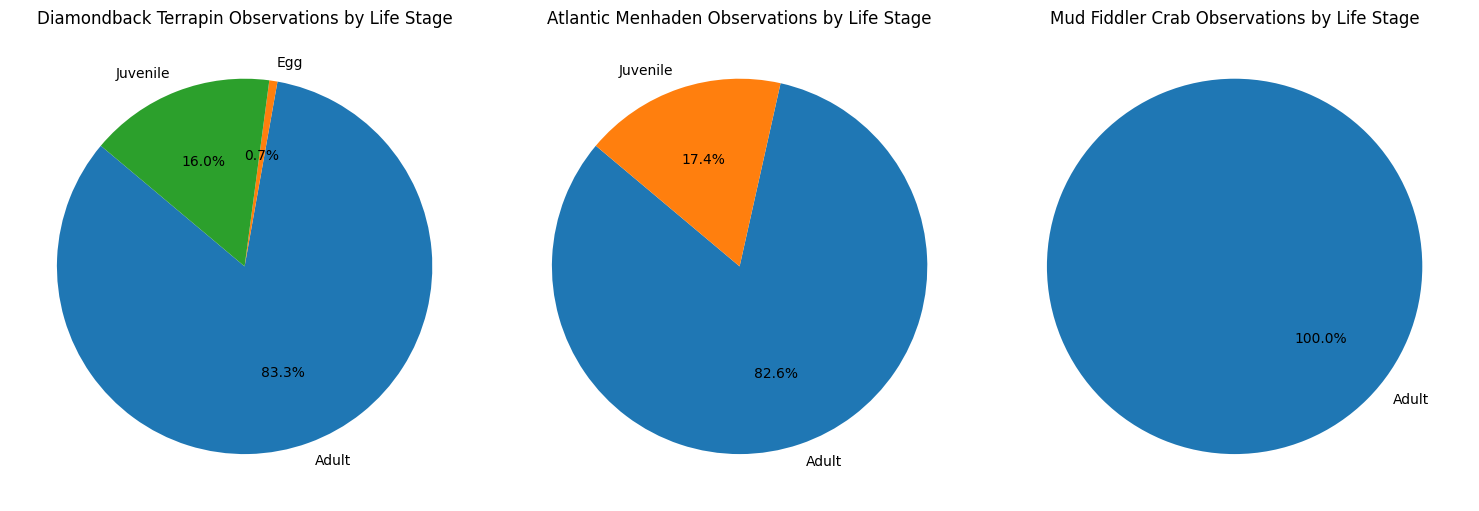

In [97]:
# Create a figure and axes for grouping like plots as subplots
fig, axis = plt.subplots(1, 3, figsize=(15, 5))
i = 0

# Get the breakdown of each species by life stage
for animal in animals:
    # Get the data from SQL database (group research grade observations by annotation)
    cursor.execute(f'''
    SELECT 
        annotations,
        COUNT(*) AS observation_count
    FROM {animal}_table
    WHERE quality_grade = 'research'
    AND annotations IS NOT 'None'
    GROUP BY annotations
''')

    # Fetch the results
    annotation_results = cursor.fetchall()


    # Extract annotations and counts from results
    annotations = [row[0] for row in annotation_results]
    anno_counts = [row[1] for row in annotation_results]

    # Plot each chart
    axis[i].pie(anno_counts, labels=annotations, autopct='%1.1f%%', startangle=140)
    axis[i].set_title(f"{animal_dict[animal]} Observations by Life Stage")
    i = i + 1


# Show plot
plt.tight_layout()
plt.show()

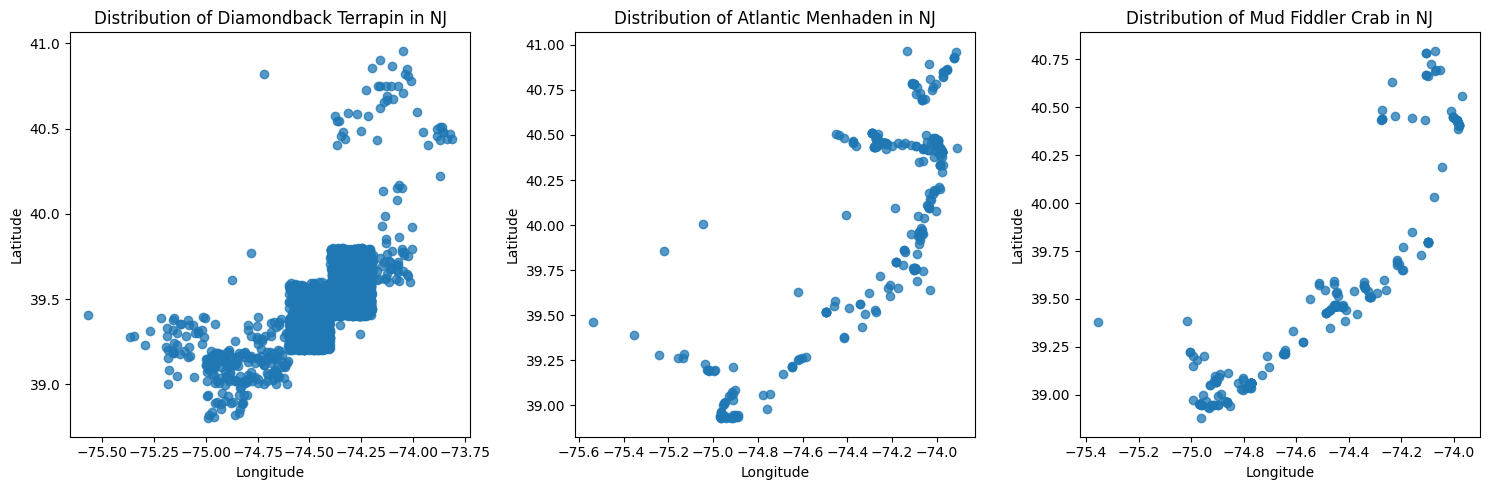

In [98]:
# Create a figure and axes for grouping like plots as subplots
fig, axis = plt.subplots(1, 3, figsize=(15, 5))
i = 0

# Get the range of each species in New Jersey using a scatter plot of the observation latitude and longitude
for animal in animals:
    # Get the data from SQL database (group observations by month and only give research grade observations)
    cursor.execute(f'''
    SELECT 
        latitude, longitude
        FROM {animal}_table
        WHERE quality_grade = 'research'
''')

    # Fetch the results
    range_results = cursor.fetchall()

    # Unpack lat and long
    latitude = [row[0] for row in range_results]
    longitude = [row[1] for row in range_results]

    # Plot each scatter
    axis[i].scatter(longitude, latitude, alpha=0.75)
    axis[i].set_xlabel("Longitude")
    axis[i].set_ylabel("Latitude")
    axis[i].set_title(f"Distribution of {animal_dict[animal]} in NJ")
    i = i + 1

# Close SQL connection
#conn.close()

# Show plot
plt.tight_layout()
plt.show()

**Best time of year for project construction:**  

Winter (ranging from late-December to late February).This minimizes the impact that the project will have on the target species (Northern Diamondback Terrapins) while also occurring during months where sightings of related species are at or near a minimum. If the project requires a longer timescale on the order of 6 months, then the best time would be October through March to minimize the impact on the terrapins.  
  
**What subset would be most impacted:**  

Adults will be the most impacted by this potential development since the vast majority of observations of the Northern DiamondBack Terrapin in the region are adults.  
  
**Range for Northern Diamondback Terrapins in NJ:**  

Terrapins are concentrated in one large area around the southeast of the range and mirrored closely by the distributions for both other species just with a much smaller overall concentration based on the observations.


**Overall Conclusion:**
I believe the project should be allowed to progress only if it meets two conditions.  

1. Be able to work on and complete the project over the course of the next winter (from around October to March) to minimize impacts on the population of adult Northern Diamondback Terrapins.
2. Allow for some areas of passage underneath the path so that the terrapins can reach spawning and feeding areas with the least obstacles. This is especially important if this project is centered/ crosses the terrapin dense area that is around 39.5, -74.5.

**Reasons for Errors in Visualization:**  
1. Certain species are more noticeable than others, i.e. people are more likely to report something like a terrapin potentially than a mudcrab or menhaden. This could explain part of the reason why there is such a large skew in the population data available from the observations.
2. There could also be a bias in when observers are present in the area and the actual distribution of terrapins in the area across a year could be less dramatically skewed than it is. For example, if there are less observers in the harsher winter/ spring months that could contribute to an already noticeable change in the terrapin population in the area over the course of the year.
3. Finally, there could be duplicate reported sightings if the animal does not have a distinctive marking and/or tag thus leading to duplicate observations especially in times where many observers are present in the area.